Exercise 3: Clustering

Student 1: name:Dmitri_Antonov , i.d.:317270510 , github:https://github.com/dimantonov
Student 2: name:Nisim_Noam_sharabi , i.d.:201606514 , github:https://github.com/nisimsh44-cloud

1. Function to create synthetic data - please do not change

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

In [2]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [4]:
!pip install mlflow
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import mlflow

mlflow.set_experiment("Clustering_Project")

clusters_range = range(2, 7)
best_k = 2
max_silhouette = -1

for k in clusters_range:
    with mlflow.start_run(run_name=f"KMeans_k_{k}"):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)

        mlflow.log_param("n_clusters", k)
        mlflow.log_metric("silhouette", score)

        if score > max_silhouette:
            max_silhouette = score
            best_k = k

        print(f"K={k}, Silhouette={score:.3f}")

print(f"Optimal clusters based on Silhouette: {best_k}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.2 MB/s eta 0:00:00


2026/01/28 08:54:41 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/01/28 08:54:41 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/01/28 08:54:41 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/01/28 08:54:41 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/01/28 08:54:41 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/01/28 08:54:41 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/01/28 08:54:41 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/28 08:54:41 INFO mlflow.store.db.utils: Updating database tables
2026/01/28 08:54:41 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/28 08:54:41 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/28 08:54:42 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/01/28 08:5

K=2, Silhouette=0.567
K=3, Silhouette=0.586
K=4, Silhouette=0.681
K=5, Silhouette=0.698
K=6, Silhouette=0.725
Optimal clusters based on Silhouette: 6


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [5]:
from sklearn.cluster import AgglomerativeClustering

linkage_types = ['ward', 'complete', 'average']
for link in linkage_types:
    with mlflow.start_run(run_name=f"Agglo_{link}"):
        agg = AgglomerativeClustering(n_clusters=best_k, linkage=link)
        labels = agg.fit_predict(X)
        score = silhouette_score(X, labels)

        mlflow.log_param("linkage", link)
        mlflow.log_metric("silhouette", score)
        print(f"Linkage={link}, Silhouette={score:.3f}")

Linkage=ward, Silhouette=0.726
Linkage=complete, Silhouette=0.659
Linkage=average, Silhouette=0.668


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


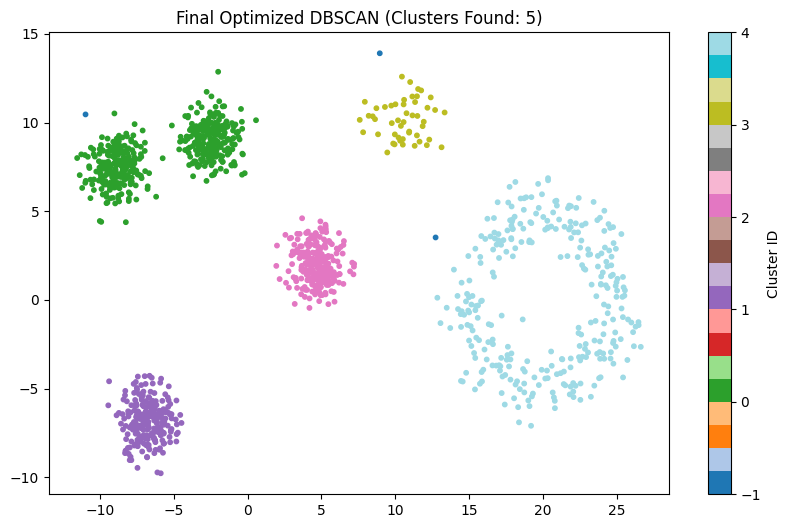

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import mlflow
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_eps = 0.23
best_ms = 10

with mlflow.start_run(run_name="DBSCAN_Final_Optimized"):
    db = DBSCAN(eps=best_eps, min_samples=best_ms)
    labels = db.fit_predict(X_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    score = silhouette_score(X_scaled, labels)

    mlflow.log_param("eps", best_eps)
    mlflow.log_param("min_samples", best_ms)
    mlflow.log_metric("silhouette", score)
    mlflow.log_metric("n_clusters", n_clusters)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
plt.title(f"Final Optimized DBSCAN (Clusters Found: {n_clusters})")
plt.colorbar(label='Cluster ID')
plt.show()

6. Compare the results and choose the best method for the data


In [28]:
import pandas as pd
import mlflow
from google.colab import files

# שליפת כל הניסויים מ-MLFlow
runs = mlflow.search_runs(experiment_names=["Clustering_Project"])

# בחירת העמודות הרלוונטיות וסינון לפי הציון הגבוה ביותר
summary = runs[['tags.mlflow.runName', 'params.eps', 'params.min_samples', 'params.n_clusters', 'metrics.silhouette']]
summary = summary.sort_values(by="metrics.silhouette", ascending=False).head(10)

# שמירה לקובץ אקסל
file_name = "clustering_final_results.xlsx"
summary.to_excel(file_name, index=False)

# הורדה למחשב
files.download(file_name)

# הצגת הטבלה ב-Notebook
summary

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,tags.mlflow.runName,params.eps,params.min_samples,params.n_clusters,metrics.silhouette
436,Agglo_ward,None,None,None,0.725690
437,KMeans_k_6,None,None,6,0.725118
432,DBSCAN_eps_1.0,1.0,None,None,0.707012
438,KMeans_k_5,None,None,5,0.697614
431,DBSCAN_eps_1.5,1.5,None,None,0.689402
358,DBSCAN_Ultra_eps_0.081_ms_3,0.08105263157894736,None,None,0.686358
357,DBSCAN_Ultra_eps_0.081_ms_5,0.08105263157894736,None,None,0.686358
360,DBSCAN_Ultra_eps_0.076_ms_3,0.07631578947368421,None,None,0.686358
359,DBSCAN_Ultra_eps_0.076_ms_5,0.07631578947368421,None,None,0.686358
354,DBSCAN_Ultra_eps_0.091_ms_3,0.09052631578947369,None,None,0.686358
